<a href="https://colab.research.google.com/github/E-Ameke/ML-Class-Project/blob/main/ML_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML_HOMEWORK_4<BR>
ELIZABETH AMEKE<BR>
662055975

Question_1<br>
Construct a fully connected neural network model for classifying the CIFAR-10
dataset. Use a 70%-30% split for training and validation data.<br>
(a) Visualize the data by plotting an image from each category from the
CIFAR-10 dataset.

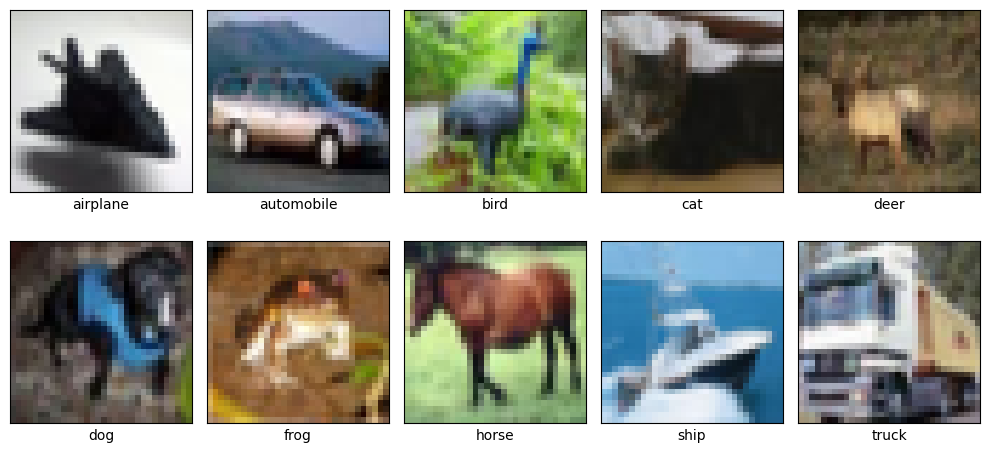

In [19]:
##(a)Answer:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

(X, y), _ = cifar10.load_data()

# Visualizing the data
my_arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
my_index = np.ones(10)
for i in my_arr:
    my_index[i] = np.where(y == i)[0][0]

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting the images
plt.figure(figsize=(10, 5))
for m, n in enumerate(my_index):
    plt.subplot(2, 5, m + 1)  # 2 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[int(n)])
    plt.xlabel(class_names[y[int(n)][0]])

plt.tight_layout()
plt.show()


.

(b) Demonstrate the tuning of the hyperparameters of the neural network
via grid-search.

In [36]:
##(b)Answer:

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [37]:
#Creating the 70%- 30% split by combining the data and splitting it
print(train_images.shape)
print(test_images.shape)
my_data= np.vstack((train_images,test_images))
my_labels=np.vstack((train_labels,test_labels))
print(my_data.shape)
print(my_labels.shape)

#The 70-30 split
X_train, X_test, y_train, y_test = train_test_split( my_data, my_labels, test_size=0.3, random_state=42)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(60000, 32, 32, 3)
(60000, 1)


In [38]:
#Transforming the label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#Reshaping the data and normalize
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train.shape)

(42000, 3072)


In [39]:
from keras.backend import categorical_crossentropy
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
loss=categorical_crossentropy,
metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size= 10, epochs=50,validation_data=(X_test,y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1573376   
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2001546 (7.64 MB)
Trainable params: 2001546 (7.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
4200/

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

563/563 [==============================] - 4s 7ms/step - loss: 3.0651 - accuracy: 0.5248
Test accuracy: 0.5247777700424194
Test loss: 3.065103769302368


Final training accuracy: 0.9371<br>
Validation accuracy: 0.5248

.

(c) Calculate and plot the training and validation losses of the tuned network.

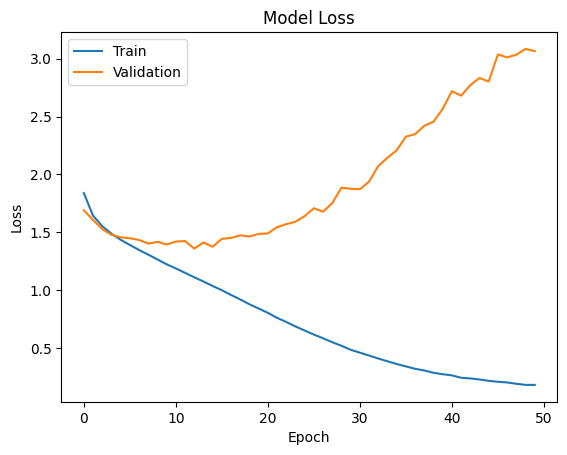

In [43]:
##(c)Anwer:

import matplotlib.pyplot as plt

# Plotting the model loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


.

(d) Calculate and plot the training and validation accuracies of the tuned
network.

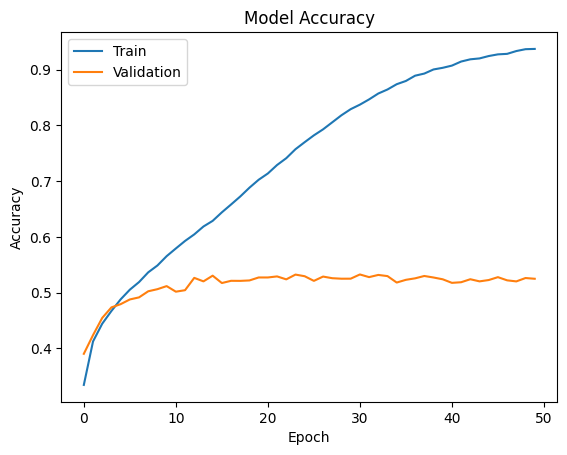

In [44]:
## (d)Answer

import matplotlib.pyplot as plt

# Plotting the model accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
